In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [69]:
df = pd.read_csv('Belize_datoslimpios.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    3357 non-null   int64  
 1   source                                        3357 non-null   object 
 2   name                                          3357 non-null   object 
 3   neighborhood_overview                         3357 non-null   object 
 4   host_name                                     3357 non-null   object 
 5   host_since                                    3357 non-null   object 
 6   host_location                                 3357 non-null   object 
 7   host_response_time                            3357 non-null   object 
 8   host_response_rate                            3357 non-null   object 
 9   host_acceptance_rate                          3357 non-null   o

In [70]:
valores_nulos=df.isnull().sum() #para que me lo de en columnas
valores_nulos

Unnamed: 0                                      0
source                                          0
name                                            0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_location                                   0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
property_type                                   0
room_type                                       0
amenities                                       0
price                                           0
has_availability                                0


## **ROOM TYPE**

In [71]:
# Revisar los tipos de habitación únicos
room_types = df['room_type'].unique()

# Columnas clave para el análisis, ajustadas a los nombres correctos
columns_to_clean = [
    'host_acceptance_rate', 'host_response_rate', 'price',
    'review_scores_rating', 'review_scores_accuracy',
    'availability_365', 'number_of_reviews',
    'reviews_per_month', 'review_scores_value'
]

# Mostrar los tipos de habitación disponibles y una muestra de los datos clave
room_types, df[columns_to_clean].head()

(array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
       dtype=object),
   host_acceptance_rate host_response_rate    price  review_scores_rating  \
 0                  90%               100%  $111.00                  4.82   
 1                 100%               100%  $603.00                  4.81   
 2                 100%               100%  $197.00                  4.59   
 3                 100%               100%  $252.00                  4.86   
 4                  17%                 0%   $52.00                  4.58   
 
    review_scores_accuracy  availability_365  number_of_reviews  \
 0                    4.83             230.0               11.4   
 1                    4.91             242.0               11.4   
 2                    4.72             311.0               11.4   
 3                    4.89             127.0               11.4   
 4                    4.92             359.0               12.0   
 
    reviews_per_month  review_scores_

In [72]:
# Limpiar columnas con porcentajes y precios
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=False).astype(float)
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype(float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Confirmar que las conversiones se realizaron correctamente
df[['host_acceptance_rate', 'host_response_rate', 'price']].describe()

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/var/folders/cr/23ck8vtn1kd8mbhg9wssxh440000gn/T/ipykernel_8615/458539144.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


,host_acceptance_rate,host_response_rate,price
count,3357.000000,3357.000000,3357.000000
mean,95.157283,96.420018,554.777182
std,15.817728,14.773980,798.438632
min,0.000000,0.000000,17.000000
25%,98.000000,100.000000,192.000000
50%,100.000000,100.000000,321.000000
75%,100.000000,100.000000,628.000000
max,100.000000,100.000000,13462.000000


host_acceptance_rate vs host_response_rate r = 0.49865086715765106


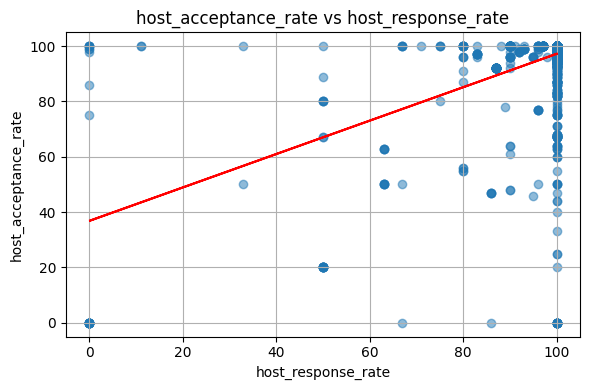

review_scores_rating vs review_scores_accuracy r = 0.6592035288398057


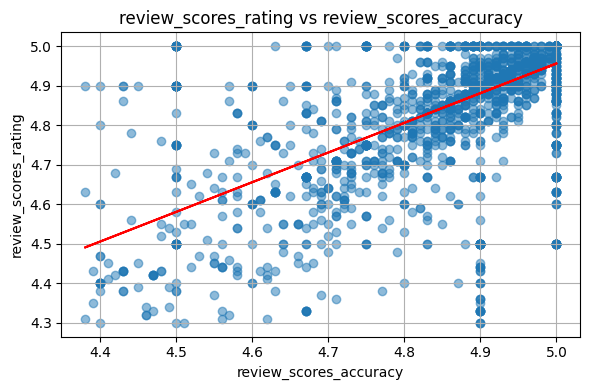

host_acceptance_rate vs price r = -0.035290678637289


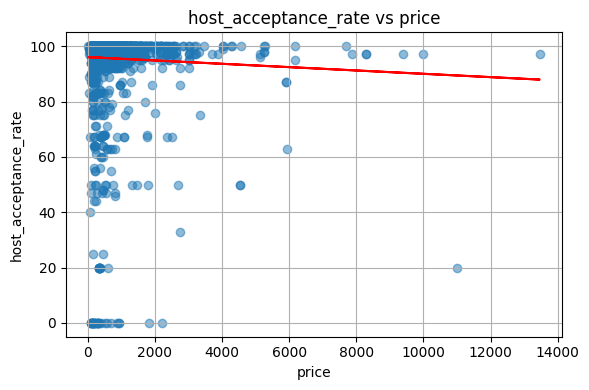

availability_365 vs number_of_reviews r = -0.0167849547921963


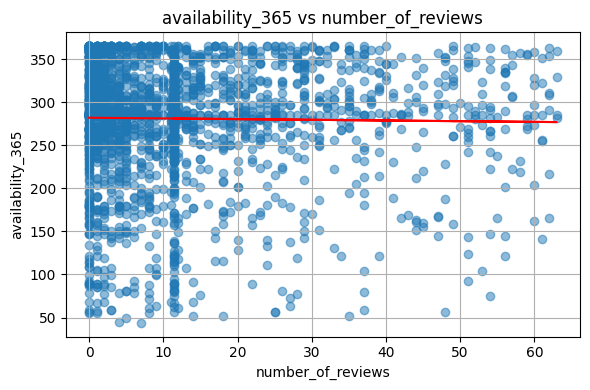

host_acceptance_rate vs number_of_reviews r = 0.081338708427609


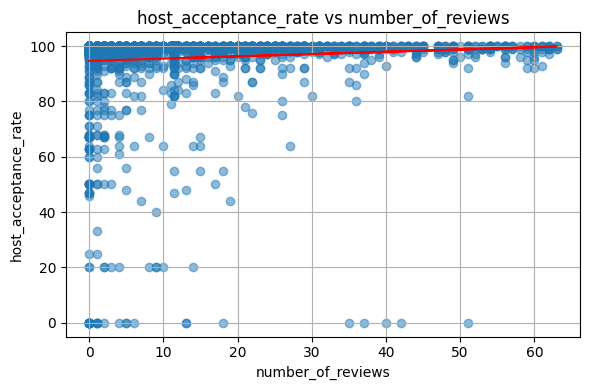

reviews_per_month vs review_scores_value r = 0.04487897212775619


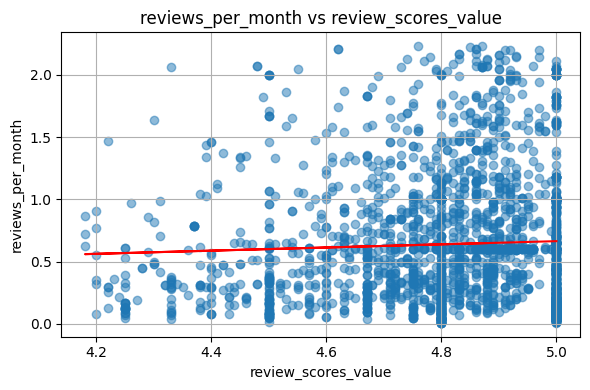

In [73]:

# Filtrar por tipo de habitación: Entire home/apt
df_entire = df[df['room_type'] == 'Entire home/apt']

# Definir los pares de variables a analizar
variable_pairs = [
    ('host_acceptance_rate', 'host_response_rate'),
    ('review_scores_rating', 'review_scores_accuracy'),
    ('host_acceptance_rate', 'price'),
    ('availability_365', 'number_of_reviews'),
    ('host_acceptance_rate', 'number_of_reviews'),
    ('reviews_per_month', 'review_scores_value')
]

# Estilo clásico de gráficos
plt.style.use('default')

# Analizar cada par y graficar
for dep, indep in variable_pairs:
    x = df_entire[indep]
    y = df_entire[dep]

    # Calcular y mostrar correlación
    correlation = x.corr(y)
    print(f"{dep} vs {indep} r = {correlation}")

    # Graficar
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.5)

    # Línea de regresión
    model = LinearRegression()
    X = x.dropna().values.reshape(-1, 1)
    Y = y[x.dropna().index].values.reshape(-1, 1)
    model.fit(X, Y)
    y_pred = model.predict(X)
    plt.plot(X, y_pred, color='red')

    plt.title(f'{dep} vs {indep}')
    plt.xlabel(indep)
    plt.ylabel(dep)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Modelo de regresión lineal simple para el par más fuerte (definido manualmente)
X = df_entire[['review_scores_accuracy']].dropna()
y = df_entire.loc[X.index, 'review_scores_rating']

modelo = LinearRegression()
modelo.fit(X, y)

r2 = modelo.score(X, y)

In [74]:
# Seleccionar solo las columnas numéricas relevantes
numeric_cols = [
    'host_acceptance_rate', 'host_response_rate', 'price',
    'review_scores_rating', 'review_scores_accuracy',
    'availability_365', 'number_of_reviews',
    'reviews_per_month', 'review_scores_value'
]

# Filtrar solo las filas del tipo 'Entire home/apt' y columnas numéricas
df_enteros_numericos = df_entire[numeric_cols].dropna()

# Calcular la matriz de correlación
matriz_correlacion = df_enteros_numericos.corr()

matriz_correlacion

,host_acceptance_rate,host_response_rate,price,review_scores_rating,review_scores_accuracy,availability_365,number_of_reviews,reviews_per_month,review_scores_value
host_acceptance_rate,1.000000,0.498651,-0.035291,0.024446,0.022065,-0.061315,0.081339,0.129845,0.020946
host_response_rate,0.498651,1.000000,0.000706,0.025560,0.040821,-0.026023,0.054572,0.117604,0.008069
price,-0.035291,0.000706,1.000000,0.061217,0.054229,-0.073783,-0.105703,-0.095233,0.011778
review_scores_rating,0.024446,0.025560,0.061217,1.000000,0.659204,-0.086410,-0.180458,0.023721,0.644080
review_scores_accuracy,0.022065,0.040821,0.054229,0.659204,1.000000,-0.093049,-0.188487,0.020710,0.622206
availability_365,-0.061315,-0.026023,-0.073783,-0.086410,-0.093049,1.000000,-0.016785,-0.012580,-0.067416
number_of_reviews,0.081339,0.054572,-0.105703,-0.180458,-0.188487,-0.016785,1.000000,0.208887,-0.171846
reviews_per_month,0.129845,0.117604,-0.095233,0.023721,0.020710,-0.012580,0.208887,1.000000,0.044879
review_scores_value,0.020946,0.008069,0.011778,0.644080,0.622206,-0.067416,-0.171846,0.044879,1.000000


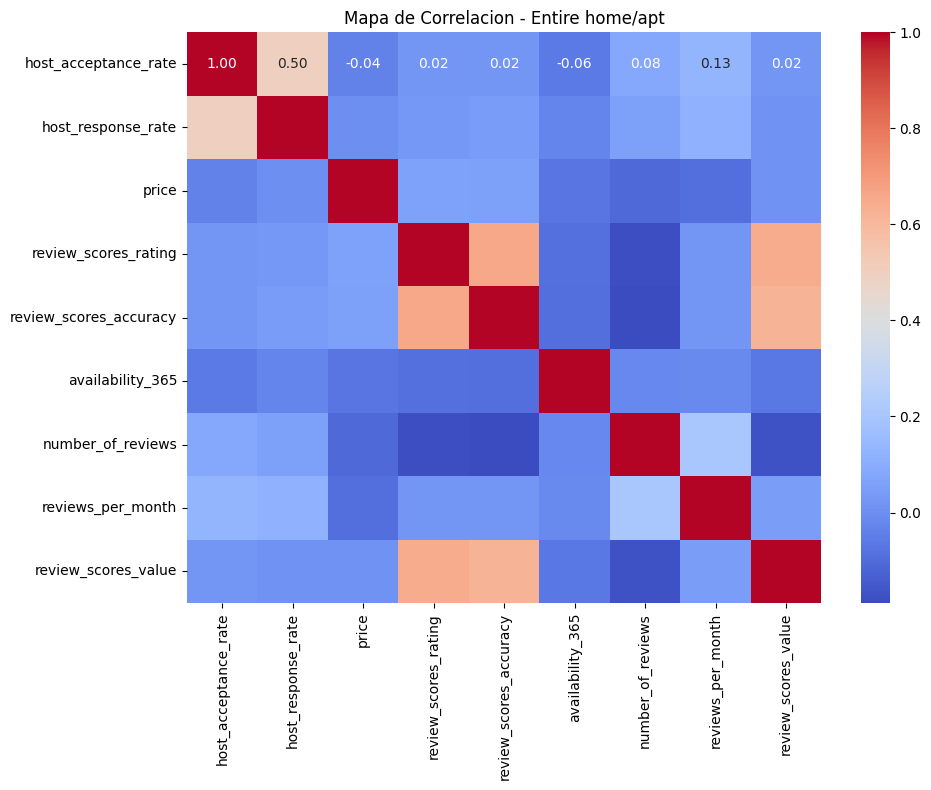

In [75]:
# Graficar el heatmap
plt.figure(figsize=(10, 8))
Heat_Map= sns.heatmap(matriz_correlacion, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Mapa de Correlacion - Entire home/apt")
plt.tight_layout()
plt.show()

In [76]:
# Crear tabla de los 10 coeficientes de correlación y determinación más altos

# Crear lista para almacenar pares y sus estadísticas
correlaciones = []

# Evaluar cada par posible dentro de las columnas numéricas seleccionadas
for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2:
            x = df_entire[[col2]].dropna()
            y = df_entire.loc[x.index, col1]

            # Verificar si hay suficientes datos
            if len(x) > 1 and len(y) > 1:
                # Calcular correlación y modelo
                r = x[col2].corr(y)
                model = LinearRegression()
                model.fit(x, y)
                r2 = model.score(x, y)

                # Guardar resultados
                correlaciones.append({
                    "Variable dependiente": col1,
                    "Variable independiente": col2,
                    "Coef. de correlación (r)": r,
                    "Coef. de determinación (R²)": r2
                })

# Convertir a DataFrame y mostrar los 10 más altos en términos absolutos de r
df_correlaciones = pd.DataFrame(correlaciones)
top_10_corr = df_correlaciones.reindex(df_correlaciones['Coef. de correlación (r)'].abs().sort_values(ascending=True).index).head(10)

top_10_corr
# Mostrar la tabla

,Variable dependiente,Variable independiente,Coef. de correlación (r),Coef. de determinación (R²)
17,price,host_response_rate,0.000706,4.980193e-07
9,host_response_rate,price,0.000706,4.980193e-07
65,review_scores_value,host_response_rate,0.008069,6.510532e-05
15,host_response_rate,review_scores_value,0.008069,6.510532e-05
23,price,review_scores_value,0.011778,1.387184e-04
66,review_scores_value,price,0.011778,1.387184e-04
46,availability_365,reviews_per_month,-0.012580,1.582590e-04
61,reviews_per_month,availability_365,-0.012580,1.582590e-04
53,number_of_reviews,availability_365,-0.016785,2.817347e-04
45,availability_365,number_of_reviews,-0.016785,2.817347e-04


## **PRIVATE ROOM** ##

In [77]:
# Filtrar los datos para el tipo de habitación "Private room"
df_private = df[df['room_type'] == 'Private room']

# Verificar cuántos datos hay
total_private = len(df_private)

# Mostrar cuántos registros se encontraron para esta categoría
print("Total de registros para 'Private room':", total_private)

Total de registros para 'Private room': 868


host_acceptance_rate vs host_response_rate -- r = 0.332


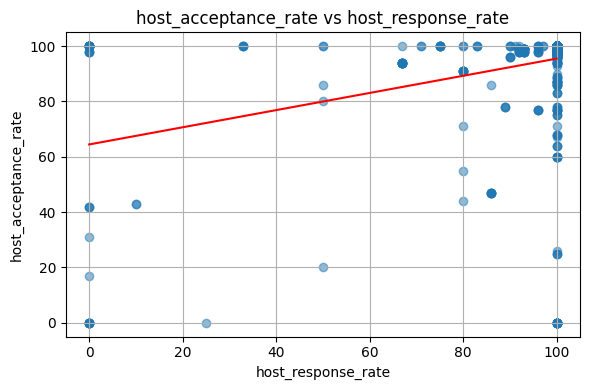

review_scores_rating vs review_scores_accuracy -- r = 0.655


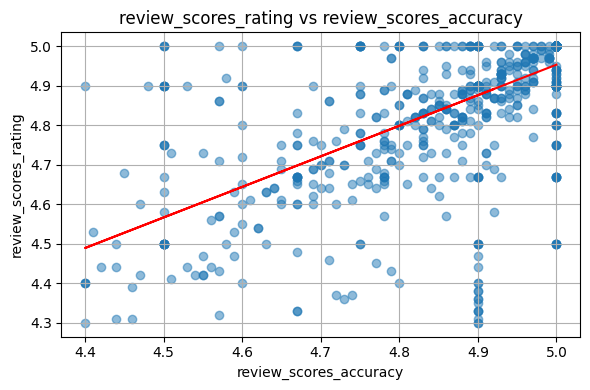

host_acceptance_rate vs price -- r = 0.063


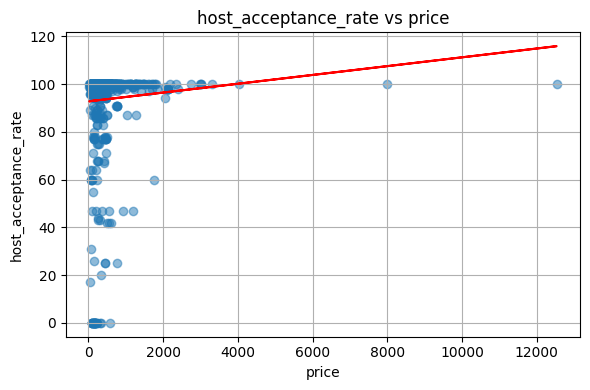

availability_365 vs number_of_reviews -- r = 0.030


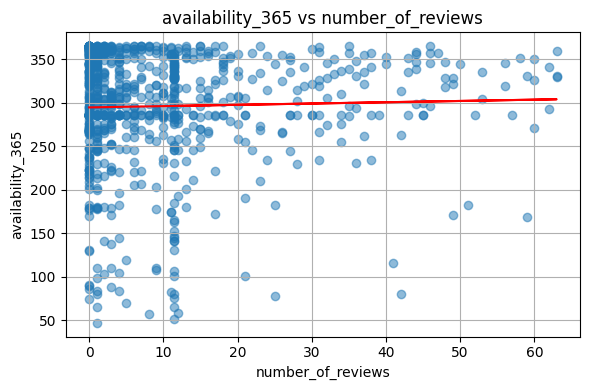

host_acceptance_rate vs number_of_reviews -- r = 0.008


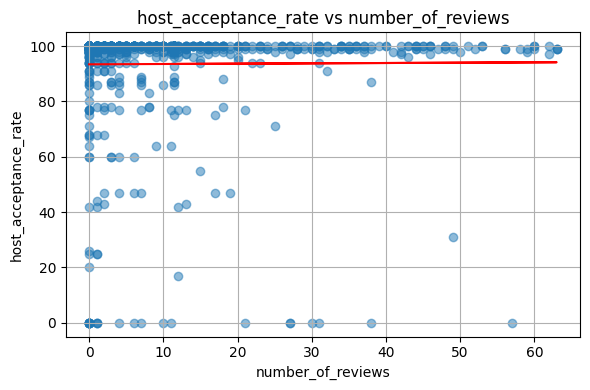

reviews_per_month vs review_scores_value -- r = 0.046


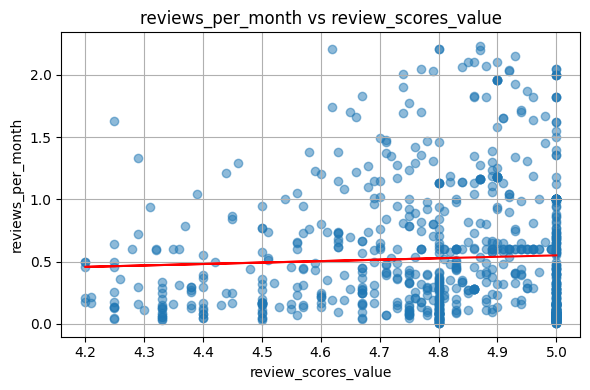

In [78]:
# Pares de variables a analizar para Private room
variable_pairs_private = [
    ('host_acceptance_rate', 'host_response_rate'),
    ('review_scores_rating', 'review_scores_accuracy'),
    ('host_acceptance_rate', 'price'),
    ('availability_365', 'number_of_reviews'),
    ('host_acceptance_rate', 'number_of_reviews'),
    ('reviews_per_month', 'review_scores_value')
]

# Estilo clásico de gráficos
plt.style.use('default')

# Graficar y mostrar correlación para cada par
for dep, indep in variable_pairs_private:
    x = df_private[indep]
    y = df_private[dep]

    # Calcular correlación
    correlation = x.corr(y)
    print(f"{dep} vs {indep} -- r = {correlation:.3f}")

    # Gráfico de dispersión con línea de regresión
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.5)

    model = LinearRegression()
    X = x.dropna().values.reshape(-1, 1)
    Y = y[x.dropna().index].values.reshape(-1, 1)
    model.fit(X, Y)
    y_pred = model.predict(X)
    plt.plot(X, y_pred, color='red')

    plt.title(f'{dep} vs {indep}')
    plt.xlabel(indep)
    plt.ylabel(dep)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

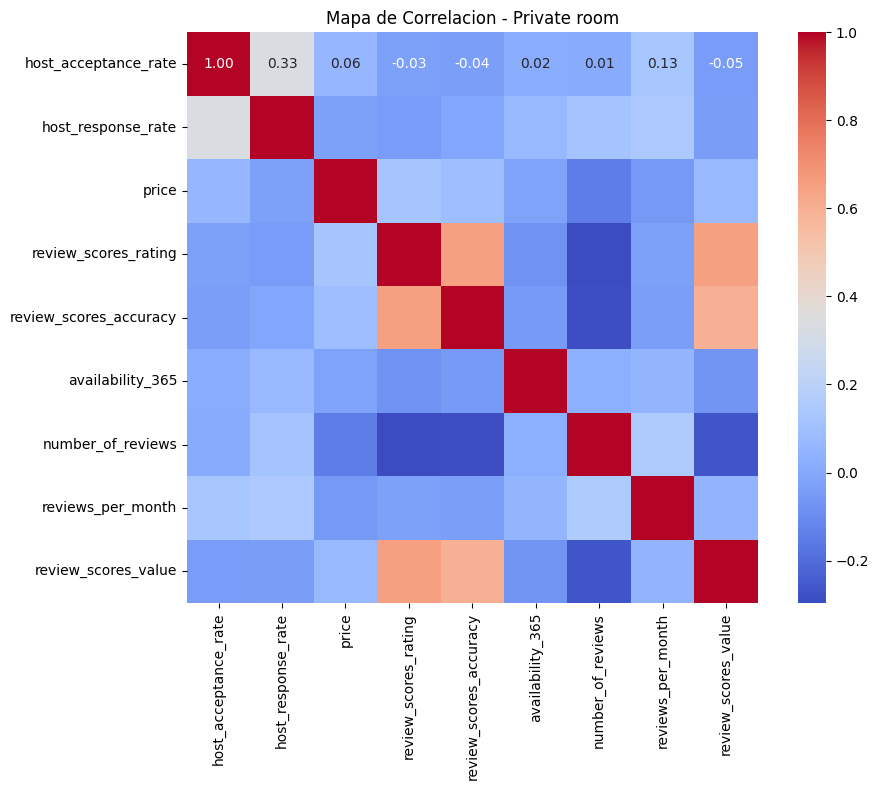

In [79]:
# Seleccionar columnas numéricas relevantes
numeric_cols_private = [
    'host_acceptance_rate', 'host_response_rate', 'price',
    'review_scores_rating', 'review_scores_accuracy',
    'availability_365', 'number_of_reviews',
    'reviews_per_month', 'review_scores_value'
]

# Crear DataFrame limpio para Private room
df_private_numeric = df_private[numeric_cols_private].dropna()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_private_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de Correlacion - Private room")
plt.tight_layout()
plt.show()

In [80]:
# Calcular correlaciones y R² para todos los pares posibles en Private room
correlations_private = []

for col1 in numeric_cols_private:
    for col2 in numeric_cols_private:
        if col1 != col2:
            x = df_private[[col2]].dropna()
            y = df_private.loc[x.index, col1]

            if len(x) > 1 and len(y) > 1:
                r = x[col2].corr(y)
                model = LinearRegression()
                model.fit(x, y)
                r2 = model.score(x, y)

                correlations_private.append({
                    "Variable dependiente": col1,
                    "Variable independiente": col2,
                    "Coef. de correlación (r)": r,
                    "Coef. de determinación (R²)": r2
                })

# Crear DataFrame y mostrar los 10 más altos
df_corr_private = pd.DataFrame(correlations_private)
top_10_corr_private = df_corr_private.reindex(df_corr_private['Coef. de correlación (r)'].abs().sort_values(ascending=True).index).head(10)

top_10_corr_private

,Variable dependiente,Variable independiente,Coef. de correlación (r),Coef. de determinación (R²)
48,number_of_reviews,host_acceptance_rate,0.008172,0.000067
5,host_acceptance_rate,number_of_reviews,0.008172,0.000067
11,host_response_rate,review_scores_accuracy,-0.010789,0.000116
33,review_scores_accuracy,host_response_rate,-0.010789,0.000116
4,host_acceptance_rate,availability_365,0.017207,0.000296
40,availability_365,host_acceptance_rate,0.017207,0.000296
42,availability_365,price,-0.021406,0.000458
20,price,availability_365,-0.021406,0.000458
59,reviews_per_month,review_scores_rating,-0.028571,0.000816
30,review_scores_rating,reviews_per_month,-0.028571,0.000816


## **HOTEL ROOM** ## 

In [81]:
# Filtrar los datos para el tipo de habitación "Hotel room"
df_hotel = df[df['room_type'] == 'Hotel room']

# Verificar cuántos datos hay
total_hotel = len(df_hotel)

# Mostrar cuántos registros se encontraron para esta categoría
print("Total de registros para 'Hotel room':", total_hotel)

Total de registros para 'Hotel room': 98


host_acceptance_rate vs host_response_rate -- r = 0.870


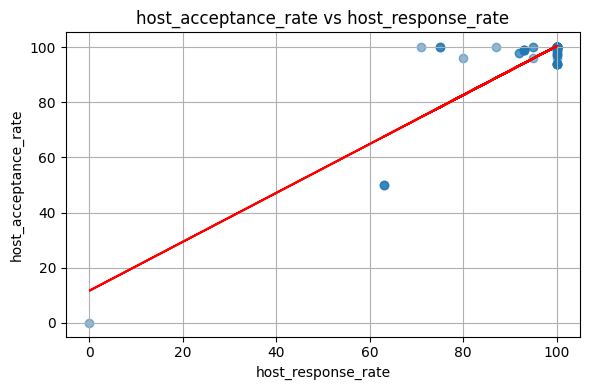

review_scores_rating vs review_scores_accuracy -- r = 0.668


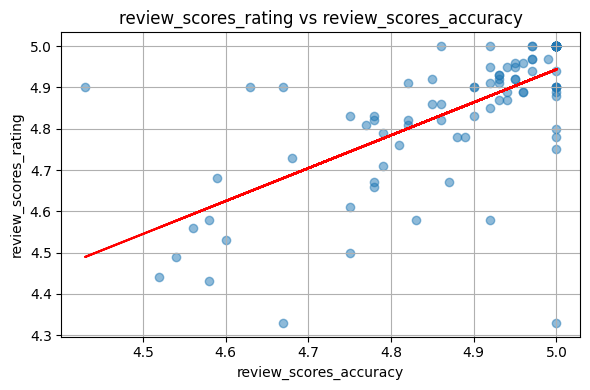

host_acceptance_rate vs price -- r = -0.450


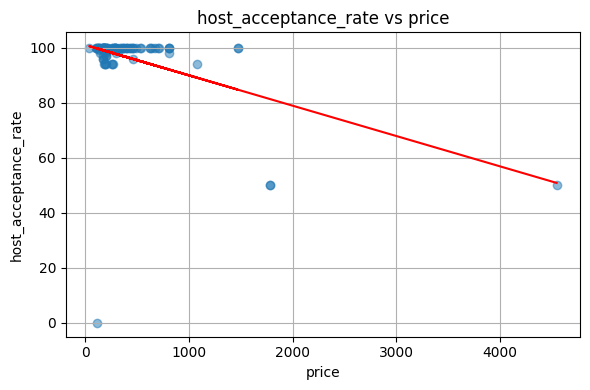

availability_365 vs number_of_reviews -- r = -0.252


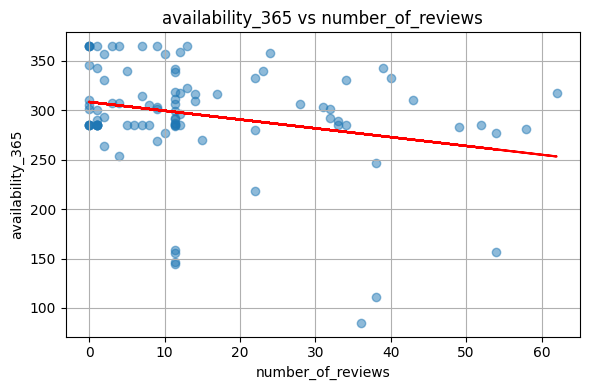

host_acceptance_rate vs number_of_reviews -- r = 0.128


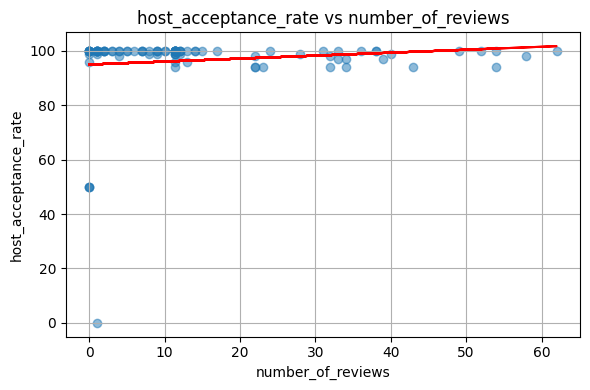

reviews_per_month vs review_scores_value -- r = -0.235


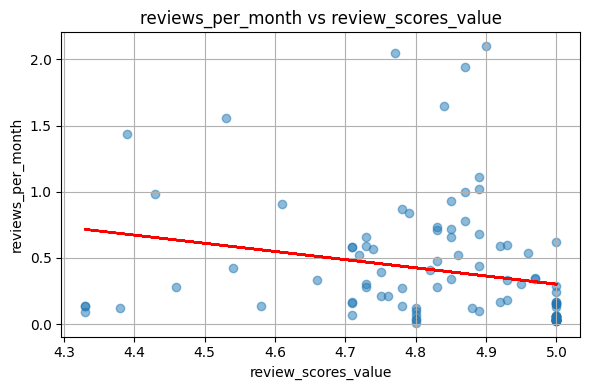

In [82]:
# Pares de variables a analizar para Hotel room
variable_pairs_hotel = [
    ('host_acceptance_rate', 'host_response_rate'),
    ('review_scores_rating', 'review_scores_accuracy'),
    ('host_acceptance_rate', 'price'),
    ('availability_365', 'number_of_reviews'),
    ('host_acceptance_rate', 'number_of_reviews'),
    ('reviews_per_month', 'review_scores_value')
]

# Estilo clásico de gráficos
plt.style.use('default')

# Graficar y mostrar correlación para cada par
for dep, indep in variable_pairs_hotel:
    x = df_hotel[indep]
    y = df_hotel[dep]

    # Calcular correlación
    correlation = x.corr(y)
    print(f"{dep} vs {indep} -- r = {correlation:.3f}")

    # Gráfico de dispersión con línea de regresión
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.5)

    model = LinearRegression()
    X = x.dropna().values.reshape(-1, 1)
    Y = y[x.dropna().index].values.reshape(-1, 1)
    model.fit(X, Y)
    y_pred = model.predict(X)
    plt.plot(X, y_pred, color='red')

    plt.title(f'{dep} vs {indep}')
    plt.xlabel(indep)
    plt.ylabel(dep)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

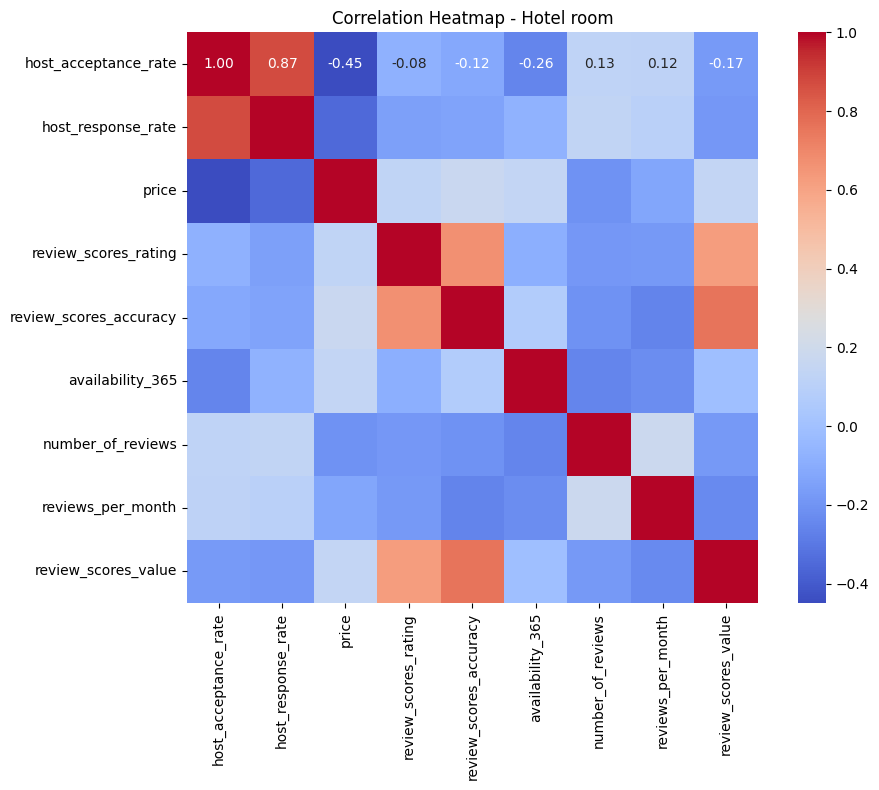

In [83]:
# Crear heatmap para Hotel room
numeric_cols_hotel = [
    'host_acceptance_rate', 'host_response_rate', 'price',
    'review_scores_rating', 'review_scores_accuracy',
    'availability_365', 'number_of_reviews',
    'reviews_per_month', 'review_scores_value'
]

# Crear DataFrame limpio
df_hotel_numeric = df_hotel[numeric_cols_hotel].dropna()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_hotel_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - Hotel room")
plt.tight_layout()
plt.show()

In [84]:
# Calcular correlaciones y R² para todos los pares posibles en Hotel room
correlations_hotel = []

for col1 in numeric_cols_hotel:
    for col2 in numeric_cols_hotel:
        if col1 != col2:
            x = df_hotel[[col2]].dropna()
            y = df_hotel.loc[x.index, col1]

            if len(x) > 1 and len(y) > 1:
                r = x[col2].corr(y)
                model = LinearRegression()
                model.fit(x, y)
                r2 = model.score(x, y)

                correlations_hotel.append({
                    "Variable dependiente": col1,
                    "Variable independiente": col2,
                    "Coef. de correlación (r)": r,
                    "Coef. de determinación (R²)": r2
                })

# Crear DataFrame y mostrar los 10 más altos
df_corr_hotel = pd.DataFrame(correlations_hotel)
top_10_corr_hotel = df_corr_hotel.reindex(df_corr_hotel['Coef. de correlación (r)'].abs().sort_values(ascending=True).index).head(10)

top_10_corr_hotel


,Variable dependiente,Variable independiente,Coef. de correlación (r),Coef. de determinación (R²)
69,review_scores_value,availability_365,-0.012699,0.000161
47,availability_365,review_scores_value,-0.012699,0.000161
44,availability_365,review_scores_accuracy,0.068189,0.004650
36,review_scores_accuracy,availability_365,0.068189,0.004650
41,availability_365,host_response_rate,-0.070459,0.004965
12,host_response_rate,availability_365,-0.070459,0.004965
2,host_acceptance_rate,review_scores_rating,-0.076979,0.005926
24,review_scores_rating,host_acceptance_rate,-0.076979,0.005926
28,review_scores_rating,availability_365,-0.092361,0.008531
43,availability_365,review_scores_rating,-0.092361,0.008531


## **SHARED ROOMS**

In [85]:
# Filtrar los datos para el tipo de habitación "Shared room"
df_shared = df[df['room_type'] == 'Shared room']

# Verificar cuántos datos hay
total_shared = len(df_shared)

# Mostrar cuántos registros se encontraron para esta categoría
print("Total de registros para 'Shared room':", total_shared)

Total de registros para 'Shared room': 10


host_acceptance_rate vs host_response_rate -- r = 1.000


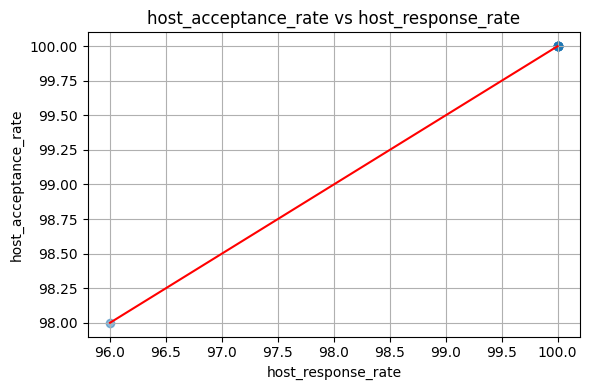

review_scores_rating vs review_scores_accuracy -- r = 0.784


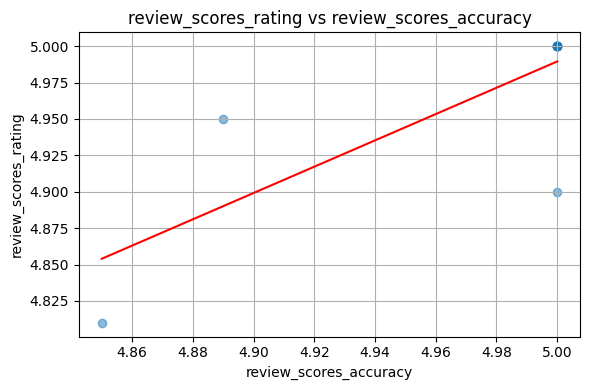

host_acceptance_rate vs price -- r = 0.207


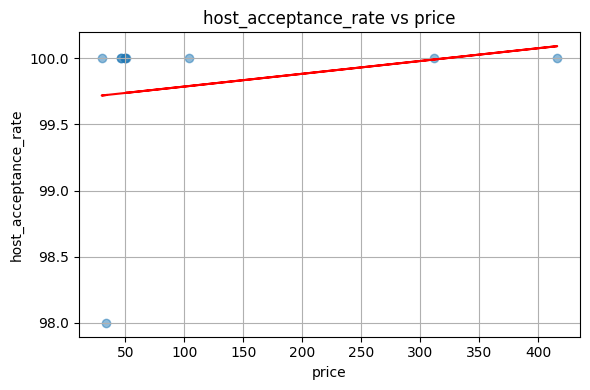

availability_365 vs number_of_reviews -- r = -0.675


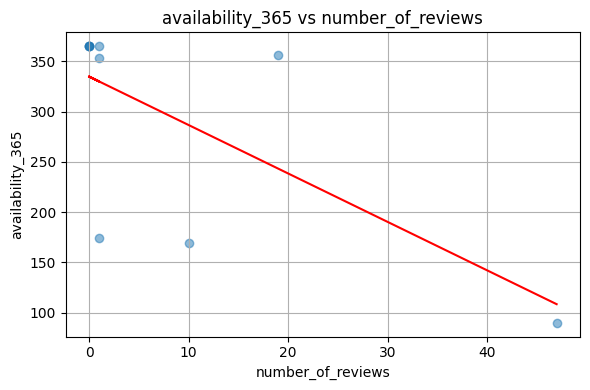

host_acceptance_rate vs number_of_reviews -- r = -0.911


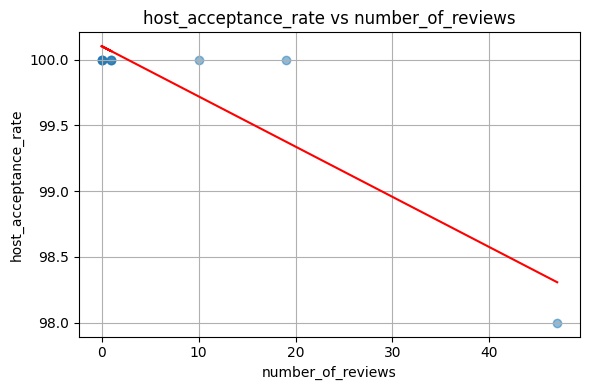

reviews_per_month vs review_scores_value -- r = 0.938


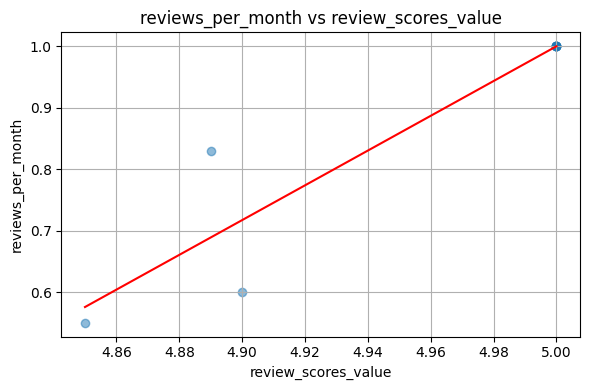

In [86]:
# Pares de variables a analizar para Shared room
variable_pairs_shared = [
    ('host_acceptance_rate', 'host_response_rate'),
    ('review_scores_rating', 'review_scores_accuracy'),
    ('host_acceptance_rate', 'price'),
    ('availability_365', 'number_of_reviews'),
    ('host_acceptance_rate', 'number_of_reviews'),
    ('reviews_per_month', 'review_scores_value')
]

# Estilo clásico de gráficos
plt.style.use('default')

# Graficar y mostrar correlación para cada par
for dep, indep in variable_pairs_shared:
    x = df_shared[indep]
    y = df_shared[dep]

    # Calcular correlación
    correlation = x.corr(y)
    print(f"{dep} vs {indep} -- r = {correlation:.3f}")

    # Gráfico de dispersión con línea de regresión
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.5)

    model = LinearRegression()
    X = x.dropna().values.reshape(-1, 1)
    Y = y[x.dropna().index].values.reshape(-1, 1)
    if len(X) > 1:
        model.fit(X, Y)
        y_pred = model.predict(X)
        plt.plot(X, y_pred, color='red')

    plt.title(f'{dep} vs {indep}')
    plt.xlabel(indep)
    plt.ylabel(dep)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


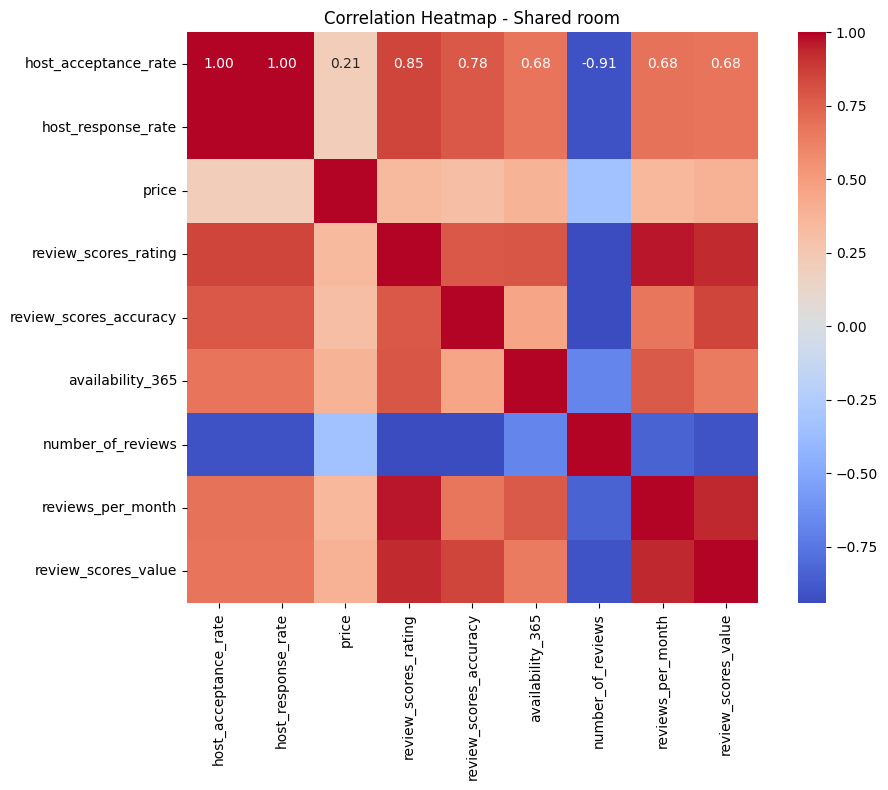

In [92]:
# Crear heatmap para Shared room
numeric_cols_shared = [
    'host_acceptance_rate', 'host_response_rate', 'price',
    'review_scores_rating', 'review_scores_accuracy',
    'availability_365', 'number_of_reviews',
    'reviews_per_month', 'review_scores_value'
]

# Crear DataFrame limpio
df_shared_numeric = df_shared[numeric_cols_shared].dropna()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_shared_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - Shared room")
plt.tight_layout()
plt.show()


In [94]:
# Calcular correlaciones y R² para todos los pares posibles en Shared room
correlations_shared = []

for col1 in numeric_cols_shared:
    for col2 in numeric_cols_shared:
        if col1 != col2:
            x = df_shared[[col2]].dropna()
            y = df_shared.loc[x.index, col1]

            if len(x) > 1 and len(y) > 1:
                r = x[col2].corr(y)
                model = LinearRegression()
                model.fit(x, y)
                r2 = model.score(x, y)

                correlations_shared.append({
                    "Variable dependiente": col1,
                    "Variable independiente": col2,
                    "Coef. de correlación (r)": r,
                    "Coef. de determinación (R²)": r2
                })

# Crear DataFrame y mostrar los 10 más altos
df_corr_shared = pd.DataFrame(correlations_shared)
top_10_corr_shared = df_corr_shared.reindex(df_corr_shared['Coef. de correlación (r)'].abs().sort_values(ascending=True).index).head(10)

top_10_corr_shared


,Variable dependiente,Variable independiente,Coef. de correlación (r),Coef. de determinación (R²)
9,host_response_rate,price,0.207106,0.042893
1,host_acceptance_rate,price,0.207106,0.042893
17,price,host_response_rate,0.207106,0.042893
16,price,host_acceptance_rate,0.207106,0.042893
34,review_scores_accuracy,price,0.312648,0.097749
19,price,review_scores_accuracy,0.312648,0.097749
26,review_scores_rating,price,0.334326,0.111774
18,price,review_scores_rating,0.334326,0.111774
50,number_of_reviews,price,-0.338130,0.114332
21,price,number_of_reviews,-0.338130,0.114332
